# Week 12. 
# Basic Statistical Analysis & Visualization.  APIs, JSON.


# Part 1.
## Data Analysis & Visualization
### Sample Project - Boston Housing Data

In [258]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [259]:
boston = load_boston()
print(type(boston))
print(boston.keys())
print(boston.data.shape)
print(type(boston.data))
print(boston.data.ndim)
print(boston.data.shape)
print('feature_names:',boston.feature_names)
print(type(boston.feature_names))
#print(boston.target)
print(boston.target.shape)
print(type(boston.target))
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
<class 'numpy.ndarray'>
2
(506, 13)
feature_names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>
(506,)
<class 'numpy.ndarray'>
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion o

In [260]:
df = pd.DataFrame(boston.data) # create a new pandas dataframe called df from the array boston.data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [261]:
df.columns = boston.feature_names # assign names of df's columns from array boston.feature_names

In [262]:
df['MEDV'] = boston.target # add boston.target 1d array as a new column called MEDV to df

In [263]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [264]:
print(df.columns)
print(type(df))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [265]:
# Select specific columns from the bigger data set
dfb=pd.DataFrame(df, columns=['AGE', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'CRIM', 'RAD', 'MEDV'])

In [266]:
dfb.head()

,AGE,ZN,INDUS,CHAS,NOX,RM,CRIM,RAD,MEDV
0,65.2,18.0,2.31,0.0,0.538,6.575,0.00632,1.0,24.0
1,78.9,0.0,7.07,0.0,0.469,6.421,0.02731,2.0,21.6
2,61.1,0.0,7.07,0.0,0.469,7.185,0.02729,2.0,34.7
3,45.8,0.0,2.18,0.0,0.458,6.998,0.03237,3.0,33.4
4,54.2,0.0,2.18,0.0,0.458,7.147,0.06905,3.0,36.2


## Descriptive Statistics

In [267]:
# RAD: index of accessibility to radial highways
# Frequency Distribution for RAD
rad_count = dfb['RAD'].value_counts()
print(rad_count)

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [268]:
# Frequency Distribution for RAD, Percentage Format
rad_count = dfb['RAD'].value_counts(normalize=True) 
print(rad_count)

24.0    0.260870
5.0     0.227273
4.0     0.217391
3.0     0.075099
6.0     0.051383
8.0     0.047431
2.0     0.047431
1.0     0.039526
7.0     0.033597
Name: RAD, dtype: float64


In [269]:
# Frequency Distribution for RAD, %, unsorted

rad_count = dfb['RAD'].value_counts(normalize = True, sort=False)
print(rad_count)

1.0     0.039526
2.0     0.047431
3.0     0.075099
5.0     0.227273
4.0     0.217391
8.0     0.047431
6.0     0.051383
7.0     0.033597
24.0    0.260870
Name: RAD, dtype: float64


In [270]:
# convert RAD values from string to numeric
dfb['RAD']=pd.to_numeric(dfb['RAD'])
rad_count = dfb['RAD'].value_counts(sort=False)
print(rad_count)
print(type(rad_count))

1.0      20
2.0      24
3.0      38
5.0     115
4.0     110
8.0      24
6.0      26
7.0      17
24.0    132
Name: RAD, dtype: int64
<class 'pandas.core.series.Series'>


In [271]:
# Frequency Distribution for CHAS
chas_count = dfb['CHAS'].value_counts(sort=False, normalize=True)
print('Frequency Distribution:', chas_count, sep='\n')

Frequency Distribution:
0.0    0.93083
1.0    0.06917
Name: CHAS, dtype: float64


In [272]:
# same as above, using groupby function
x=dfb.groupby('CHAS').size()
#x=data.groupby('CHAS').size()*100/len(data) -- for percentage
print(x)

CHAS
0.0    471
1.0     35
dtype: int64


## Visualization

### Distribution Plots (Univariate)

Text(0.5,1,'Number of houses close to vs. far from Charles River')

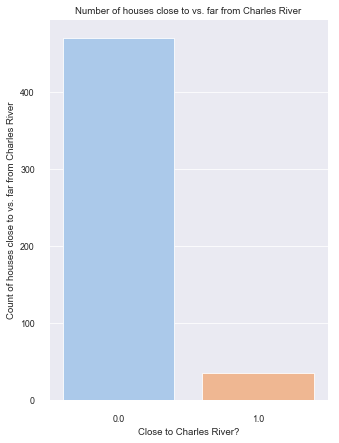

In [273]:
%matplotlib inline
# FREQUENCY COUNT - BAR CHART FORMAT  
# countplot
plt.figure(figsize=(5,7))
sns.countplot(x='CHAS', data=dfb, palette='pastel')
plt.xlabel("Close to Charles River?")
plt.ylabel("Count of houses close to vs. far from Charles River")
plt.title("Number of houses close to vs. far from Charles River")

Text(0.5,1,'Histogram for MEDV')

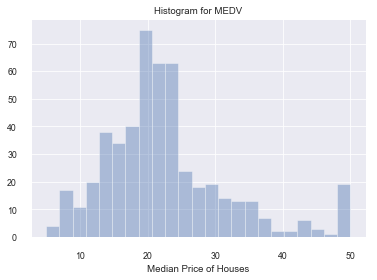

In [274]:
# FREQUENCY COUNT - HISTOGRAM 
# distplot
# documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

#sns.distplot(dfb['MEDV'])  - compare this with the plot when dropna() is specified
sns.distplot(dfb['MEDV'].dropna(), kde=False)  # kde (kernel density estimate) is for showing dist smoothing curve
# read more about kde here: http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/
plt.xlabel("Median Price of Houses")
plt.title("Histogram for MEDV")

In [275]:
dfb['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [276]:
dfb['CHAS'].describe()

# Is there a problem in the descriptive stats below?
# knowledge of basic stats is essential in figuring out appropriate desc. measures

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

Text(0.5,1,'Number of houses close to vs. far fromCharles River')

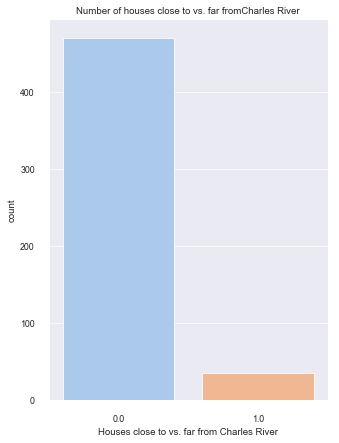

In [277]:
# FREQUENCY COUNT FOR NUMBER OF HOUSES NEXT TO CHARLES RIVER

%matplotlib inline
plt.figure(figsize=(5,7))
sns.countplot(x='CHAS', data=dfb, palette='pastel')
plt.xlabel("Houses close to vs. far from Charles River")
plt.title("Number of houses close to vs. far fromCharles River")

In [278]:
# CHAS is a categorical variable
# Next step is to designate appropriate variables as categorical

dfb['CHAS']=dfb['CHAS'].astype('category')
dfb['CHAS']=dfb['CHAS'].cat.rename_categories(["Far", "Close"])

In [279]:
dfb['CHAS'].describe() #descriptives for categorical variable CHAS

count     506
unique      2
top       Far
freq      471
Name: CHAS, dtype: object

Text(0.5,1,'Number of houses close to vs. far from Charles River')

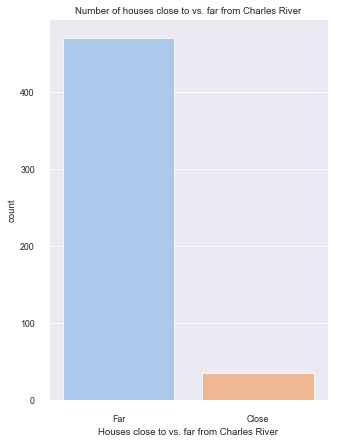

In [280]:
%matplotlib inline
plt.figure(figsize=(5,7))
sns.countplot(x='CHAS', data=dfb, palette='pastel')
plt.xlabel("Houses close to vs. far from Charles River")
plt.title("Number of houses close to vs. far from Charles River")

## Relational Plots

### For 2 Numerical Variables

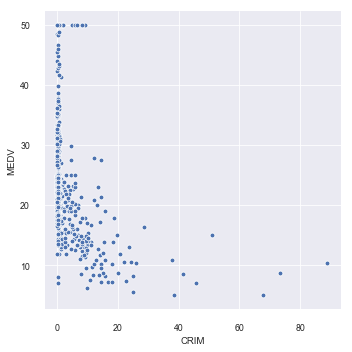

In [281]:
sns.relplot(x = 'CRIM', y='MEDV', data=df, kind='scatter')

### When one of the two variables is categorical

Text(9.175,0.5,'Median House Value')

<Figure size 288x504 with 0 Axes>

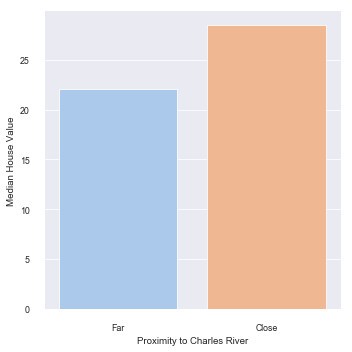

In [282]:
# BAR CHART TO SHOW RELATIONSHIP BETWEEN MEDV & CHAS
# catplot
plt.figure(figsize=(4,7))
sns.catplot(x='CHAS', y='MEDV', data=dfb, kind='bar', ci = False, palette = 'pastel')  # ci refers to error bars
plt.xlabel("Proximity to Charles River")
plt.ylabel('Median House Value')

Text(0.5,1,'Box Plots comparing House Prices of Houses Far from vs. Close to Charles River')

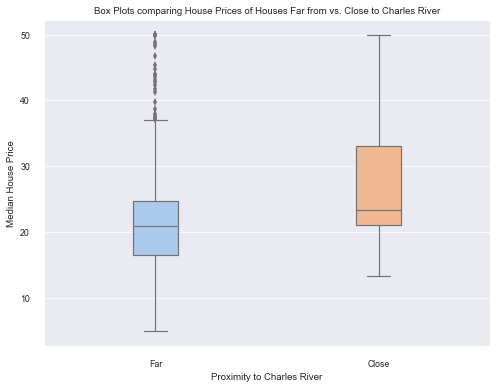

In [283]:
# BOX PLOT TO SHOW RELATIONSHIP BETWEEN MEDV & CHAS 
# documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html
%matplotlib inline
plt.figure(figsize=(8,6))
sns.boxplot(x='CHAS', y='MEDV', data=dfb, width = 0.2, palette= 'pastel') 
plt.xlabel("Proximity to Charles River")
plt.ylabel('Median House Price')
plt.title('Box Plots comparing House Prices of Houses Far from vs. Close to Charles River')

#### Going back to Hospital Data Example
Which one of the below do you find the clearest way to compare hospital overall ratings between two types of hospitals?

In [284]:
pd.crosstab(hosp.Hospitaloverallrating, hosp.HospitalType)

HospitalType,Acute Care Hospitals,Critical Access Hospitals
Hospitaloverallrating,,
1,257,2
2,702,48
3,922,256
4,844,309
5,300,35


In [285]:
hosp = pd.read_csv('Hospital_Data.csv')
hosp.groupby('HospitalType')['Hospitaloverallrating'].describe()

,count,mean,std,min,25%,50%,75%,max
HospitalType,,,,,,,,
Acute Care Hospitals,3025.0,3.075372,1.114600,1.0,2.0,3.0,4.0,5.0
Critical Access Hospitals,650.0,3.503077,0.724323,1.0,3.0,4.0,4.0,5.0


Text(6.8,0.5,'Hospital Overall Rating')

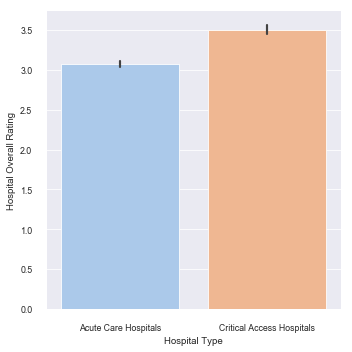

In [286]:
%matplotlib inline
sns.catplot(x='HospitalType', y='Hospitaloverallrating', kind='bar', data=hosp, palette='pastel') 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

Text(0,0.5,'Hospital Overall Rating')

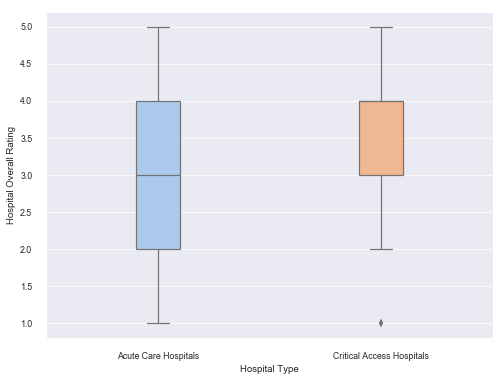

In [287]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.boxplot(x='HospitalType', y='Hospitaloverallrating', data=hosp, width=0.2, palette='pastel') 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

In [206]:
hosp['EmergencyServices']=hosp['EmergencyServices'].astype('category')
hosp['EmergencyServices']=hosp['EmergencyServices'].cat.rename_categories(["Without ES", "With ES"])

### Comparing Overall Ratings Across 
#### Hospital Types & Hospitals With vs. Without Emergency Services

Text(28.6793,0.5,'Hospital Overall Rating')

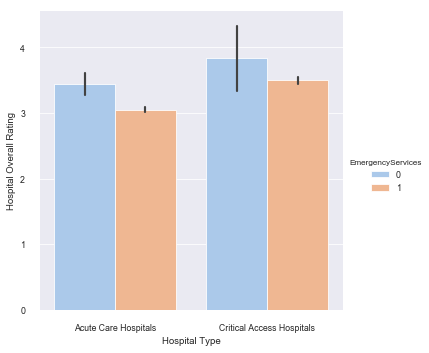

In [288]:
# GROUP BAR CHART

sns.set_context(context='paper')
sns.catplot(x='HospitalType', y='Hospitaloverallrating', hue='EmergencyServices', kind='bar', data=hosp, palette='pastel') 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

Text(0,0.5,'Hospital Overall Rating')

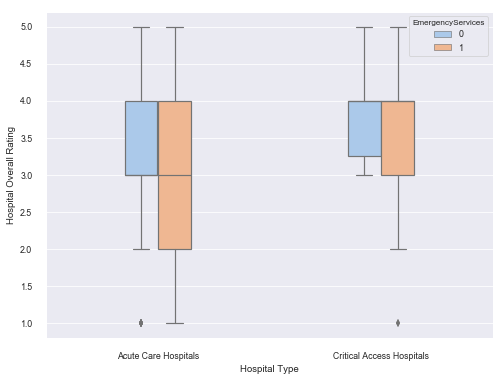

In [289]:
# GROUP BOX PLOTS

%matplotlib inline
#sns.set_context(context='paper')
plt.figure(figsize=(8,6))
sns.boxplot(x='HospitalType', y='Hospitaloverallrating', hue = 'EmergencyServices', data=hosp, width=0.3, palette='pastel') 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

In [29]:
# General Workflow
# Get the data (from csv, web etc)
# Get a sense of the data by 
    # examine few rows (df.head(), for example)
    # data cleaning/manipulation (missing data, data from multiple sources) 
    # figure out the level of the variable (categorical or numeric)
    # Sometimes you may need to assign some variables to be explicitly numeric (for example, RAD above)... 
        # ... while others as categorical (for example, CHAS above)
    # get them done in the beginning before starting data analysis

# pandas is very good for the steps above; pandas, scipy and viz. packages for steps below
# What is/are your target variable? what are your predictors?
# Understand descriptive stats, distributions etc (sometimes using visualizations)
# choose a stats model; run the model; evaluate the model (use scipy package; or even R after exporting the data)


## Visualizing Linear Relationship Between 2 Variables

Text(0.5,1,'Scatterplot to show the relationship between No. of Rooms and Median House Price')

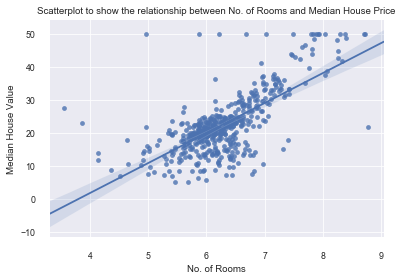

In [290]:
# SCATTER PLOT FOR 2 VARIABLES, WITH REGRESSION FIT LINE 
# use regplot

sns.regplot(x='RM', y='MEDV', data=dfb, fit_reg=True)  
plt.xlabel("No. of Rooms")
plt.ylabel('Median House Value')
plt.title("Scatterplot to show the relationship between No. of Rooms and Median House Price")

In [31]:
# stats knowledge - look at the value around y=50; implication?

## Statistical Analysis -- Basics

In [291]:
# CORRELATION MATRIX FOR ALL VARIABLES IN DATAFRAME
dfb.corr()

,AGE,ZN,INDUS,NOX,RM,CRIM,RAD,MEDV
AGE,1.000000,-0.569537,0.644779,0.731470,-0.240265,0.350784,0.456022,-0.376955
ZN,-0.569537,1.000000,-0.533828,-0.516604,0.311991,-0.199458,-0.311948,0.360445
INDUS,0.644779,-0.533828,1.000000,0.763651,-0.391676,0.404471,0.595129,-0.483725
NOX,0.731470,-0.516604,0.763651,1.000000,-0.302188,0.417521,0.611441,-0.427321
RM,-0.240265,0.311991,-0.391676,-0.302188,1.000000,-0.219940,-0.209847,0.695360
CRIM,0.350784,-0.199458,0.404471,0.417521,-0.219940,1.000000,0.622029,-0.385832
RAD,0.456022,-0.311948,0.595129,0.611441,-0.209847,0.622029,1.000000,-0.381626
MEDV,-0.376955,0.360445,-0.483725,-0.427321,0.695360,-0.385832,-0.381626,1.000000


In [105]:
# stats component from scipy is now a separate package
# scipy is a broader package for doing a range of computations
# people typically use python for data manipulation
# use R/stats packages for data analysis; however, python for programming chops

import statsmodels.api as sm

In [177]:
# ORDINARY LEAST SQUARE REGRESSION
# IV = # of rooms, DV = median house prices
result=sm.OLS(dfb['MEDV'], dfb['RM']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          3.74e-256
Time:                        15:14:25   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
# other datasets
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
# http://statweb.stanford.edu/~sabatti/data.html

# Part 2.
## APIs & JSON

### JSON (JavaScript Object Notation) 
- lightweight object format that is used to exchange data in a structured format. 
- similar to XML
- used more widely because it is lightweight.  
- It is easy to understand both visually by humans and the computers
- Many APIs (Application Programming Interfaces) use JSON to provide the data to users

In [219]:
# JSON format: strings that contains a dictionary structure inside

jstr1='{"id": "1", "name": "Tim", "age": "20"}'
jstr2='''{
           "id": "2", 
           "name": "Kim", 
           "age": "21"
         }'''

In [222]:
# To parse json data - use json.loads 
# json looks similar in structure to a dictionary
# json structure is useful to know as it is used widely to exchange data

import json

jp1=json.loads(jstr1)
jp2=json.loads(jstr2)
print(type(jp1), len(jp1))
print(jp1)
print(jp2)

<class 'dict'> 3
{'id': '1', 'name': 'Tim', 'age': '20'}
{'id': '2', 'name': 'Kim', 'age': '21'}


In [223]:
for k,v in jp1.items():
    print (k,v)

id 1
name Tim
age 20


In [224]:
jstr3='''[
          {
           "id": "1", 
           "name": "Tim", 
           "age": "20"
          },
         
          {
           "id": "2", 
           "name": "Kim", 
           "age": "21"
          },
         
          {
           "id": "3", 
           "name": "Juan", 
           "age": "20"
          }
         ]'''

In [226]:
jp3 = json.loads(jstr3)
jp3

[{'id': '1', 'name': 'Tim', 'age': '20'},
 {'id': '2', 'name': 'Kim', 'age': '21'},
 {'id': '3', 'name': 'Juan', 'age': '20'}]

In [230]:
for item in jp3:
    print(item['name'])

Tim
Kim
Juan


In [231]:
for item in jp3:
    print(item)

{'id': '1', 'name': 'Tim', 'age': '20'}
{'id': '2', 'name': 'Kim', 'age': '21'}
{'id': '3', 'name': 'Juan', 'age': '20'}


In [227]:
jstr4='''[
          {
           "id": "1", 
           "name": "Tim", 
           "age": "20",
           "tel": {"ext":"1000", "private":"no"}
          },
         
          {
           "id": "2", 
           "name": "Kim", 
           "age": "21",
           "tel": {"ext":"1001", "private":"yes"}
          },
         
          {
           "id": "3", 
           "name": "Juan", 
           "age": "20",
           "tel": {"ext":"1002", "private":"yes"}
          }
         ]'''

In [229]:
jp4=json.loads(jstr4)
jp4

[{'id': '1',
  'name': 'Tim',
  'age': '20',
  'tel': {'ext': '1000', 'private': 'no'}},
 {'id': '2',
  'name': 'Kim',
  'age': '21',
  'tel': {'ext': '1001', 'private': 'yes'}},
 {'id': '3',
  'name': 'Juan',
  'age': '20',
  'tel': {'ext': '1002', 'private': 'yes'}}]

In [234]:
for dt in jp4:
    print(dt['name'], dt['tel'])

Tim {'ext': '1000', 'private': 'no'}
Kim {'ext': '1001', 'private': 'yes'}
Juan {'ext': '1002', 'private': 'yes'}


In [235]:
# mini exercise: write code to print only the names and whether the extension is private or not (i.e. the value of the private key)

### Getting data from the web using json and api (simple request-response cycle)
#### Example: OMDBAPI

## OMDB API
Send all data requests to:

http://www.omdbapi.com/?apikey=[yourkey]&

    t=[movie name]
    i= [movie id]
    plot = short or full
    y = [year]


In [330]:
import requests
import json

# https://www.omdbapi.com/ 
#First: go to the link above & get an API key (sign up for the free account type)

url="http://www.omdbapi.com/?apikey=e9279373&t=Frozen" # apikey number entered, & t = Frozen for the movie Frozen
#url="http://www.omdbapi.com/?apikey=e9279373&t=Frozen&plot=full" uncomment this if want full plot

r = requests.get(url)
frozen = r.text

print('The first few characters in the string: \n', frozen[:30], '\n')
print('The entire string:\n', frozen, end='\n\n')

The first few characters in the string: 
 {"Title":"Frozen","Year":"2013 

The entire string:
 {"Title":"Frozen","Year":"2013","Rated":"PG","Released":"27 Nov 2013","Runtime":"102 min","Genre":"Animation, Adventure, Comedy, Family, Fantasy, Musical","Director":"Chris Buck, Jennifer Lee","Writer":"Jennifer Lee (screenplay by), Hans Christian Andersen (story inspired by \"The Snow Queen\" by), Chris Buck (story by), Jennifer Lee (story by), Shane Morris (story by)","Actors":"Kristen Bell, Idina Menzel, Jonathan Groff, Josh Gad","Plot":"When the newly-crowned Queen Elsa accidentally uses her power to turn things into ice to curse her home in infinite winter, her sister Anna teams up with a mountain man, his playful reindeer, and a snowman to change the weather condition.","Language":"English, Norwegian","Country":"USA","Awards":"Won 2 Oscars. Another 77 wins & 57 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMTQ1MjQwMTE5OF5BMl5BanBnXkFtZTgwNjk3MTcyMDE@._V1_SX300.jpg","Ra

In [312]:
frozen2=json.loads(frozen)
print(type(frozen2), len(frozen2))
print(frozen2)

<class 'dict'> 25
{'Title': 'Frozen', 'Year': '2013', 'Rated': 'PG', 'Released': '27 Nov 2013', 'Runtime': '102 min', 'Genre': 'Animation, Adventure, Comedy, Family, Fantasy, Musical', 'Director': 'Chris Buck, Jennifer Lee', 'Writer': 'Jennifer Lee (screenplay by), Hans Christian Andersen (story inspired by "The Snow Queen" by), Chris Buck (story by), Jennifer Lee (story by), Shane Morris (story by)', 'Actors': 'Kristen Bell, Idina Menzel, Jonathan Groff, Josh Gad', 'Plot': 'When the newly-crowned Queen Elsa accidentally uses her power to turn things into ice to curse her home in infinite winter, her sister Anna teams up with a mountain man, his playful reindeer, and a snowman to change the weather condition.', 'Language': 'English, Norwegian', 'Country': 'USA', 'Awards': 'Won 2 Oscars. Another 77 wins & 57 nominations.', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTQ1MjQwMTE5OF5BMl5BanBnXkFtZTgwNjk3MTcyMDE@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Val

In [313]:
for key,value in frozen2.items():
    print(key, '\t'*3, value)

Title 			 Frozen
Year 			 2013
Rated 			 PG
Released 			 27 Nov 2013
Runtime 			 102 min
Genre 			 Animation, Adventure, Comedy, Family, Fantasy, Musical
Director 			 Chris Buck, Jennifer Lee
Writer 			 Jennifer Lee (screenplay by), Hans Christian Andersen (story inspired by "The Snow Queen" by), Chris Buck (story by), Jennifer Lee (story by), Shane Morris (story by)
Actors 			 Kristen Bell, Idina Menzel, Jonathan Groff, Josh Gad
Plot 			 When the newly-crowned Queen Elsa accidentally uses her power to turn things into ice to curse her home in infinite winter, her sister Anna teams up with a mountain man, his playful reindeer, and a snowman to change the weather condition.
Language 			 English, Norwegian
Country 			 USA
Awards 			 Won 2 Oscars. Another 77 wins & 57 nominations.
Poster 			 https://m.media-amazon.com/images/M/MV5BMTQ1MjQwMTE5OF5BMl5BanBnXkFtZTgwNjk3MTcyMDE@._V1_SX300.jpg
Ratings 			 [{'Source': 'Internet Movie Database', 'Value': '7.5/10'}, {'Source': 'Rotten Tomatoes', 

In [314]:
print(frozen2.keys())

dict_keys(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'])


In [317]:
print(frozen2['Plot'])

When the newly-crowned Queen Elsa accidentally uses her power to turn things into ice to curse her home in infinite winter, her sister Anna teams up with a mountain man, his playful reindeer, and a snowman to change the weather condition.


In [337]:
print(frozen2['Ratings'])

[{'Source': 'Internet Movie Database', 'Value': '7.5/10'}, {'Source': 'Rotten Tomatoes', 'Value': '90%'}, {'Source': 'Metacritic', 'Value': '74/100'}]


In [338]:
print('Metascore:', frozen2['Metascore'], '\nIMDB:', frozen2['imdbRating'])

Metascore: 74 
IMDB: 7.5
